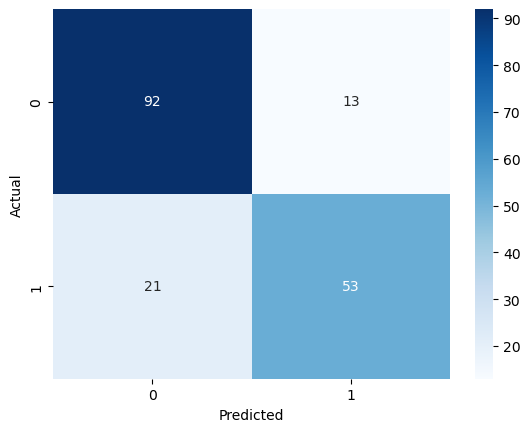

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Pclass: -0.928
Sex: 2.611
Age: -0.031
Fare: 0.003
SibSp: -0.316
Parch: -0.125


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df=pd.read_csv("downloads/titanic_clean.csv")

X= df[['Pclass','Sex','Age','Fare','SibSp','Parch']]
y=df['Survived']

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=42)

model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred=model.predict(X_test)

#confusion matrix
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#detailed metrics
print(classification_report(y_test,y_pred))

#see future importance
import numpy as np

coeff=model.coef_[0]
for col, val in zip(X.columns, coeff):
    print(f"{col}: {val:.3f}")
